# Data Wrangling Template

## Gather

In [1]:
import tweepy
import requests
import pandas as pd
import json
from timeit import default_timer as timer
import numpy as np

In [52]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

## Assess

In [53]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)
r = req.content
tsv_file = open('im.tsv', 'wb')
tsv_file.write(r)
tsv_file.close

<function BufferedWriter.close>

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [55]:
count=0
fails_dict=[]
tweet_ids = df_twitter_archive.tweet_id.values
start=timer()
data={}
data['json']=[]
for tweet_id in tweet_ids:
    count+=1
    try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            data['json'].append({
            'tweet_id': tweet_id,
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
            })
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        fails_dict.append(tweet_id)
        pass
end = timer()
print(end - start)
print(len(fails_dict))

888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
34 - Sorry, that page does not exist.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366284874571778 _ 404 Not Found
144 - No status found with that ID.
8370

Rate limit reached. Sleeping for: 578


754011816964026368 _ 404 Not Found
144 - No status found with that ID.
680055455951884288 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 581


1999.4627160999999
28


In [56]:
for i in range (0,len(data['json'])):
    data['json'][i]['retweet_count'] = int(data['json'][i]['retweet_count'])
    data['json'][i]['favorite_count'] = int(data['json'][i]['favorite_count']) 

In [57]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile, cls=NpEncoder)

In [3]:
d = []
with open('tweet_json.txt', encoding='utf8') as json_file:
    data = json.load(json_file)
    for p in data['json']:
         d.append({'tweet_id': p['tweet_id'],
                     'retweet_count': p['retweet_count'],
                   'favorite_count': p['favorite_count']})
df_archive_json = pd.DataFrame(d,columns=['tweet_id','retweet_count','favorite_count'])
df_archive_json.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7153           34402
1  892177421306343426           5380           29849
2  891815181378084864           3545           22462
3  891689557279858688           7358           37593
4  891327558926688256           7909           35901

In [4]:
df_archive_json.shape

(2328, 3)

In [5]:
df_image_prediction = pd.read_csv('im.tsv', '\t')

C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Columns

- **tweet_id** : Tweet ID also our primary key for this table
- **in_reply_to_status_id** : 
- **in_reply_to_user_id** : 
- **timestamp** : The time when the tweet was posted
- **source** : From where was the tweet posted
- **text** : Tweet content
- **retweeted_status_id** : 
- **retweeted_status_user_id** :
- **retweeted_status_timestamp** : The time the retweet was done
- **expanded_urls** : Tweet url
- **rating_numerator** : 
- **rating_denominator** : 
- **name** : Name of the Dog
- **doggo, floofer, pupper, puppo** : Usage of these terms in the tweet content

In [6]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_twitter_archive.duplicated().sum()

0

In [8]:
df_twitter_archive.groupby('name')['tweet_id'].nunique().sort_values()

name
Kingsley      1
Julius        1
Sora          1
Kaia          1
Kaiya         1
           ... 
Lucy         11
Oliver       11
Charlie      12
a            55
None        745
Name: tweet_id, Length: 957, dtype: int64

**name** column consists of unusual dog names, usage of 'a' and 'None' needs to be replaced with a default value

In [9]:
df_twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [10]:
df_twitter_archive.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

**in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp**  are having high number of null values, hence ignoring these columns as it will have small effect on our analysis.

In [11]:
df_twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

**source** column needs to be re-defined into categorical column distinguishing the actual source in simple terms instead of the usage of HTML Tags.

In [12]:
df_twitter_archive.expanded_urls.isnull().sum()

59

In [13]:
df_twitter_archive.query('expanded_urls.isnull()', engine='python')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [14]:
len(df_twitter_archive.query('expanded_urls.isnull()', engine='python'))

59

**extended_url** To remove all rows which has null values for the extended url value, as these all look to be replies or retweets to the original tweets.

In [15]:
df_twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [16]:
pd.set_option("display.max_colwidth", None)
df_twitter_archive.query('pupper == "pupper"')['text']

29      This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox
49                       This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
78                                       RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G
82            This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6
                                                                                   ...                                                                             
1995            

Seperate the Tweet content with the link url

In [17]:
df_twitter_archive.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: "count"})

doggo  floofer  pupper  puppo  count
0   None     None    None   None   1976
1   None     None    None  puppo     29
2   None     None  pupper   None    245
3   None  floofer    None   None      9
4  doggo     None    None   None     83
5  doggo     None    None  puppo      1
6  doggo     None  pupper   None     12
7  doggo  floofer    None   None      1

In [18]:
df_twitter_archive.query('doggo == "doggo" and puppo == "puppo"')['text']

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

**doggo, floofer, pupper, puppo** - needs to be converted to a categorical column of whether the tweet includes these dog terms

In [19]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [20]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**rating_numerator** and **rating_denominator** have vaired rating metric system, it is best to evaluate this in terms of categorical types by having a standard of all dogs rated as base of 10 and for anything above 10 will be termed as a good rating and anything below 10 is a average/bad rating

In [21]:
df_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Columns

- **tweet_id** : Tweet ID also our primary key for this table
- **jpg_url** : Image url
- **img_num** : Number of images
- **p1** : First Predicted Object
- **p1_conf** : Confidence level of the prediction
- **p1_dog** : Whether the predicted object is a Dog or not
- **p2** : Second Predicted Object
- **p2_conf** : Confidence level of the prediction
- **p2_dog** : Whether the predicted object is a Dog or not
- **p3** : Third Predicted Object
- **p3_conf** : Confidence level of the prediction
- **p3_dog** : Whether the predicted object is a Dog or not

In [22]:
df_image_prediction.query('p1_dog == False')

tweet_id  \
6     666051853826850816   
8     666057090499244032   
17    666104133288665088   
18    666268910803644416   
21    666293911632134144   
...                  ...   
2026  882045870035918850   
2046  886680336477933568   
2052  887517139158093824   
2071  891689557279858688   
2074  892420643555336193   

                                                                                      jpg_url  \
6                                             https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8                                             https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17                                            https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18                                            https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21                                            https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
...                                                                                       ...   
2026                                          https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
2046                                          https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg   
2071                                          https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2074                                          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
6           1        box_turtle  0.933012   False          mud_turtle   
8           1     shopping_cart  0.962465   False     shopping_basket   
17          1               hen  0.965932   False                cock   
18          1  desktop_computer  0.086502   False                desk   
21          1  three-toed_sloth  0.914671   False               otter   
...       ...               ...       ...     ...                 ...   
2026        1          web_site  0.949591   False               dhole   
2046        1       convertible  0.738995   False          sports_car   
2052        1         limousine  0.130432   False           tow_truck   
2071        1       paper_towel  0.170278   False  Labrador_retriever   
2074        1            orange  0.097049   False               bagel   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
6     0.045885   False          terrapin  0.017885   False  
8     0.014594   False  golden_retriever  0.007959    True  
17    0.033919   False         partridge  0.000052   False  
18    0.085547   False          bookcase  0.079480   False  
21    0.015250   False    great_grey_owl  0.013207   False  
...        ...     ...               ...       ...     ...  
2026  0.017326   False  golden_retriever  0.006941    True  
2046  0.139952   False         car_wheel  0.044173   False  
2052  0.029175   False     shopping_cart  0.026321   False  
2071  0.168086    True           spatula  0.040836   False  
2074  0.085851   False            banana  0.076110   False  

[543 rows x 12 columns]

In [23]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [25]:
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Quality
##### `twitter_archive` table
- **name** column consists of unusual dog names, usage of 'a' and 'None' needs to be replaced with a default value
- **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp**  are having high number of null values, hence ignoring these columns as it will have small effect on our analysis.
- **source** column needs to be re-defined into categorical column distinguishing the actual source in simple terms instead of the usage of HTML Tags.
- lower case all names in the **name** column
- To remove all rows which has null values for the **extended_url** value, as these all look to be replies or retweets to the original tweets.
- To convert object to timestamp datatype for the **timestamp** column
- Convert **tweet_id** to string from int

##### `image_prediction` table
- make the **p1, p2, p3** column value in lowercase to maintain consistency

##### `archive_json` table

#### Tidiness
- **doggo, floofer, pupper, puppo** - needs to be converted to a categorical column of whether the tweet includes these dog terms
- **rating_numerator** and **rating_denominator** have vaired rating metric system, it is best to evaluate this in terms of categorical types by having a standard of all dogs rated as base of 10 and for anything above 10 will be termed as a good rating and anything below 10 is a average/bad rating
- Join all 3 dataframes into a master dataframe
- Seperate the Tweet content with the link url in the **text** column

# Cleaning

## Quality

In [26]:
df_twitter_archive_copy = df_twitter_archive.copy()
df_image_prediction_copy = df_image_prediction.copy()
df_archive_json_copy = df_archive_json.copy()

**Define**: name column consists of unusual dog names, usage of 'a' and 'None' needs to be replaced with a default value

**Code**

In [27]:
a = df_twitter_archive_copy.groupby('name')['tweet_id'].nunique().sort_values()
a[-20:]

name
Scout        6
Leo          6
Buddy        7
Bailey       7
Daisy        7
Toby         7
an           7
the          8
Sadie        8
Winston      9
Bo           9
Penny       10
Tucker      10
Lola        10
Cooper      11
Lucy        11
Oliver      11
Charlie     12
a           55
None       745
Name: tweet_id, dtype: int64

In [28]:
df_twitter_archive_copy.name.replace(['a','None', 'an'],'no_dog_name', inplace=True)

**Test**

In [29]:
a = df_twitter_archive_copy.groupby('name')['tweet_id'].nunique().sort_values()
a[-20:]

name
Stanley          6
Scout            6
Koda             6
Bella            6
Toby             7
Buddy            7
Daisy            7
Bailey           7
Sadie            8
the              8
Bo               9
Winston          9
Penny           10
Tucker          10
Lola            10
Cooper          11
Lucy            11
Oliver          11
Charlie         12
no_dog_name    807
Name: tweet_id, dtype: int64

**Define**: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are having high number of null values, hence ignoring these columns as it will have small effect on our analysis.

**Code**

In [30]:
df_twitter_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [31]:
df_twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [32]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


**Define**: source column needs to be re-defined into categorical column distinguishing the actual source in simple terms instead of the usage of HTML Tags.

**Code**

In [33]:
df_twitter_archive_copy['source'].astype('str')

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [34]:
df_twitter_archive_copy['actual_source'] = df_twitter_archive_copy['source'].str.extract(r'(>[^<]*<)')

In [35]:
df_twitter_archive_copy['actual_source'] = df_twitter_archive_copy['actual_source'].str[1:-1]

In [36]:
df_twitter_archive_copy['actual_source'].astype('str')

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: actual_source, Length: 2356, dtype: object

**Test**

In [37]:
df_twitter_archive_copy['actual_source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [38]:
df_twitter_archive_copy.drop(['source'],axis=1,inplace=True)

In [39]:
df_twitter_archive_copy.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0                13                  10   Phineas  None    None   None  None   
1                13                  10     Tilly  None    None   None  None   
2                12                  10    Archie  None    None   None  None   
3                13                  10     Darla  None    None   None  None   
4                12                  10  Franklin  None    None   None  None   

        actual_source  
0  Twitter for iPhone  
1  Twitter for iPhone  
2  Twitter for iPhone  
3  Twitter for iPhone  
4  Twitter for iPhone

**Define**: lower case all names in the name column

**Code**

In [40]:
df_twitter_archive_copy.name = df_twitter_archive_copy.name.str.lower()

**Test**

In [41]:
df_twitter_archive_copy.tail()

tweet_id                  timestamp  \
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                                                                             text  \
2351                     Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352    This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2354  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2355          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

                                                        expanded_urls  \
2351  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2352  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2353  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2354  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2355  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator         name doggo floofer pupper  \
2351                 5                  10  no_dog_name  None    None   None   
2352                 6                  10  no_dog_name  None    None   None   
2353                 9                  10  no_dog_name  None    None   None   
2354                 7                  10  no_dog_name  None    None   None   
2355                 8                  10  no_dog_name  None    None   None   

     puppo       actual_source  
2351  None  Twitter for iPhone  
2352  None  Twitter for iPhone  
2353  None  Twitter for iPhone  
2354  None  Twitter for iPhone  
2355  None  Twitter for iPhone

**Define**: To remove all rows which has null values for the extended_url value, as these all look to be replies or retweets to the original tweets.

**Code**

In [42]:
df_twitter_archive_copy.dropna(subset=['expanded_urls'], inplace=True)

**Test**

In [43]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   text                2297 non-null   object
 3   expanded_urls       2297 non-null   object
 4   rating_numerator    2297 non-null   int64 
 5   rating_denominator  2297 non-null   int64 
 6   name                2297 non-null   object
 7   doggo               2297 non-null   object
 8   floofer             2297 non-null   object
 9   pupper              2297 non-null   object
 10  puppo               2297 non-null   object
 11  actual_source       2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


**Define**: To convert object to timestamp datatype for the timestamp column

**Code**

In [44]:
 df_twitter_archive_copy['timestamp'] = df_twitter_archive_copy['timestamp'].apply(pd.to_datetime)

**Test**

In [45]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   text                2297 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2297 non-null   int64              
 5   rating_denominator  2297 non-null   int64              
 6   name                2297 non-null   object             
 7   doggo               2297 non-null   object             
 8   floofer             2297 non-null   object             
 9   pupper              2297 non-null   object             
 10  puppo               2297 non-null   object             
 11  actual_source       2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define**: Convert tweet_id to string from int

**Code**

In [46]:
df_twitter_archive_copy.tweet_id = df_twitter_archive_copy.tweet_id.astype('str')
df_image_prediction_copy.tweet_id = df_image_prediction_copy.tweet_id.astype('str')
df_archive_json_copy.tweet_id = df_archive_json_copy.tweet_id.astype('str')

**Test**

In [47]:
df_archive_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


**Define**: make the p1, p2, p3 column value in lowercase to maintain consistency

**Code**

In [48]:
df_image_prediction_copy.p1 = df_image_prediction_copy.p1.str.lower()
df_image_prediction_copy.p2 = df_image_prediction_copy.p2.str.lower()
df_image_prediction_copy.p3 = df_image_prediction_copy.p3.str.lower()

**Test**

In [49]:
df_image_prediction_copy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

**Define**: doggo, floofer, pupper, puppo - needs to be converted to a categorical column of whether the tweet includes these dog terms

**Code**

In [50]:
df_twitter_archive_copy.doggo = df_twitter_archive_copy.doggo == 'doggo'
df_twitter_archive_copy.floofer = df_twitter_archive_copy.floofer == 'floofer'
df_twitter_archive_copy.pupper = df_twitter_archive_copy.pupper == 'pupper'
df_twitter_archive_copy.puppo = df_twitter_archive_copy.puppo == 'puppo'

In [51]:
df_twitter_archive_copy.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: "count"})

doggo  floofer  pupper  puppo  count
0  False    False   False  False   1923
1  False    False   False   True     28
2  False    False    True  False    243
3  False     True   False  False      9
4   True    False   False  False     80
5   True    False   False   True      1
6   True    False    True  False     12
7   True     True   False  False      1

In [52]:
df_twitter_archive_copy['dog_terms_usage'] = ((df_twitter_archive_copy.doggo == True) | 
                            (df_twitter_archive_copy.floofer == True) | 
                            (df_twitter_archive_copy.pupper == True) | 
                            (df_twitter_archive_copy.puppo == True))

In [53]:
df_twitter_archive_copy.replace([False,True],[0,1], inplace=True)

**Test**

In [54]:
df_twitter_archive_copy.dog_terms_usage.value_counts()

0    1923
1     374
Name: dog_terms_usage, dtype: int64

**Define**: rating_numerator and rating_denominator have vaired rating metric system, it is best to evaluate this in terms of categorical types by having a standard of all dogs rated as base of 10 and for anything above 10 will be termed as a good rating and anything below 10 is a average/bad rating

**Code**

In [55]:
df_twitter_archive_copy['rating_new'] = df_twitter_archive_copy.rating_numerator >= df_twitter_archive_copy.rating_denominator

**Test**

In [56]:
df_twitter_archive_copy['rating_new'].value_counts()

True     1866
False     431
Name: rating_new, dtype: int64

**Define**:Join all 3 dataframes into a master dataframe

**Code**

In [57]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   object             
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   text                2297 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2297 non-null   int64              
 5   rating_denominator  2297 non-null   int64              
 6   name                2297 non-null   object             
 7   doggo               2297 non-null   int64              
 8   floofer             2297 non-null   int64              
 9   pupper              2297 non-null   int64              
 10  puppo               2297 non-null   int64              
 11  actual_source       2297 non-null   object             
 12  dog_terms_usage     2297 non-null 

In [58]:
#df_twitter_archive_copy
df_1 = pd.merge(df_twitter_archive_copy,df_archive_json_copy, how = 'left', on='tweet_id')
master_df = pd.merge(df_1,df_image_prediction_copy, how = 'left', on='tweet_id')

**Test**

In [59]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   object             
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   text                2297 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2297 non-null   int64              
 5   rating_denominator  2297 non-null   int64              
 6   name                2297 non-null   object             
 7   doggo               2297 non-null   int64              
 8   floofer             2297 non-null   int64              
 9   pupper              2297 non-null   int64              
 10  puppo               2297 non-null   int64              
 11  actual_source       2297 non-null   object             
 12  dog_terms_usage     2297 non-null 

In [60]:
import re
master_df['text'] = master_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# Store and Analyze the data

In [131]:
master_df.to_csv('twitter_archive_master.csv', index=False)

In [62]:
df = pd.read_csv('twitter_data.csv')

In [63]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'actual_source', 'dog_terms_usage', 'rating_new', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [64]:
master_df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'actual_source', 'dog_terms_usage', 'rating_new', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Analysis
1. Find coorelation between usage of the Dog terms to the rating
2. Word Cloud for the most used word in the tweet for both negetive and posetive rating

In [65]:
df1 = df[['tweet_id','rating_new', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count']]

In [66]:
df1.head()

tweet_id  rating_new  rating_numerator  rating_denominator  \
0  892420643555336193        True                13                  10   
1  892177421306343426        True                13                  10   
2  891815181378084864        True                12                  10   
3  891689557279858688        True                13                  10   
4  891327558926688256        True                12                  10   

   doggo  floofer  pupper  puppo  retweet_count  favorite_count  
0      0        0       0      0         7153.0         34402.0  
1      0        0       0      0         5380.0         29849.0  
2      0        0       0      0         3545.0         22462.0  
3      0        0       0      0         7358.0         37593.0  
4      0        0       0      0         7909.0         35901.0

In [67]:
df1.shape

(2297, 10)

In [68]:
import seaborn as sns

<AxesSubplot:>

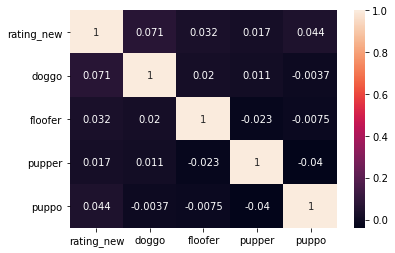

In [127]:
sns.heatmap(df1[['rating_new', 'doggo', 'floofer', 'pupper', 'puppo']].corr(), annot=True)

In [128]:
df1.shape

(2297, 10)

Considering only those tweets which has dog terms used

In [70]:
df1_1 = df1.query('doggo == 1 or floofer == 1 or pupper == 1 or puppo == 1')

<AxesSubplot:>

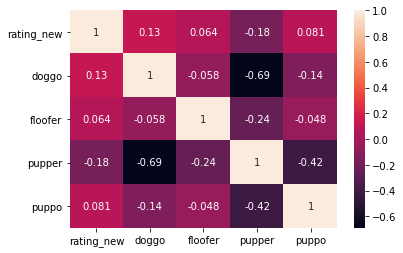

In [71]:
sns.heatmap(df1_1[['rating_new','doggo', 'floofer', 'pupper', 'puppo']].corr(), annot=True)

In [129]:
df1_1.shape

(374, 10)

In [130]:
df1_1.head()

tweet_id  rating_new  rating_numerator  rating_denominator  \
9   890240255349198849        True                14                  10   
12  889665388333682689        True                13                  10   
14  889531135344209921        True                13                  10   
29  886366144734445568        True                12                  10   
42  884162670584377345        True                12                  10   

    doggo  floofer  pupper  puppo  retweet_count  favorite_count  
9       1        0       0      0         6210.0         28467.0  
12      0        0       0      1         8523.0         42826.0  
14      0        0       0      1         1915.0         13579.0  
29      0        0       1      0         2687.0         18891.0  
42      1        0       0      0         2536.0         18253.0

1. There is a very weak relation between Usage of dog terms to the rating
2. Usage of dog terms can be compared with effect it has on retweet and favourite

<AxesSubplot:>

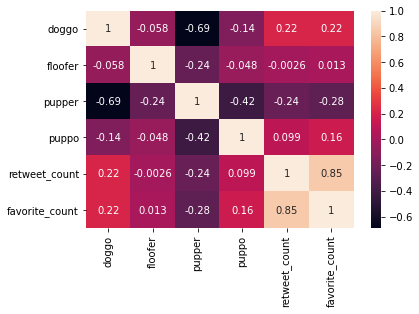

In [72]:
sns.heatmap(df1_1[['doggo', 'floofer', 'pupper', 'puppo','retweet_count','favorite_count']].corr(), annot=True)

In [73]:
from subprocess import check_output
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import locale
import os
import matplotlib.pyplot as plt

In [74]:
wordcloud = WordCloud().generate(' '.join(df['text'].tolist()))

#save the wordcloud
wordcloud.to_file(os.path.join("dog_names.png"))


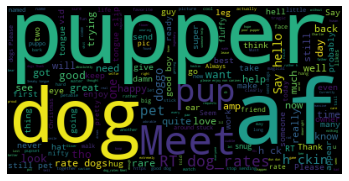

In [75]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We see that the usage of the word pupper is the most frequent in tweets

In [76]:
df2 = df.dropna()

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2296
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2058 non-null   int64  
 1   timestamp           2058 non-null   object 
 2   text                2058 non-null   object 
 3   expanded_urls       2058 non-null   object 
 4   rating_numerator    2058 non-null   int64  
 5   rating_denominator  2058 non-null   int64  
 6   name                2058 non-null   object 
 7   doggo               2058 non-null   int64  
 8   floofer             2058 non-null   int64  
 9   pupper              2058 non-null   int64  
 10  puppo               2058 non-null   int64  
 11  actual_source       2058 non-null   object 
 12  dog_terms_usage     2058 non-null   int64  
 13  rating_new          2058 non-null   bool   
 14  retweet_count       2058 non-null   float64
 15  favorite_count      2058 non-null   float64
 16  jpg_ur

In [78]:
df2_p1 = df2.query('p1_dog == True')
df2_p2 = df2.query('p2_dog == True')
df2_p3 = df2.query('p3_dog == True')

In [79]:
dog_breeds_p1 = df2_p1['p1'].tolist()
dog_breeds_p2 = df2_p2['p2'].tolist()
dog_breeds_p3 = df2_p3['p3'].tolist()

In [80]:
dog_breed = np.array(dog_breeds_p1+dog_breeds_p2+dog_breeds_p3, dtype=object)

In [81]:
dog_breed_list = np.unique(dog_breed)

In [82]:
len(dog_breed_list)

118

### There are 118 different unique Dog breeds in the given data set!

In [93]:
df[['p1_conf', 'p2_conf','p3_conf']].describe()

p1_conf       p2_conf       p3_conf
count  2075.000000  2.075000e+03  2.075000e+03
mean      0.594548  1.345886e-01  6.032417e-02
std       0.271174  1.006657e-01  5.090593e-02
min       0.044333  1.011300e-08  1.740170e-10
25%       0.364412  5.388625e-02  1.622240e-02
50%       0.588230  1.181810e-01  4.944380e-02
75%       0.843855  1.955655e-01  9.180755e-02
max       1.000000  4.880140e-01  2.734190e-01

It is safe to take p1 as p2 and p3 max prediction is just 48% and on average give between 6-13% prediction score, whereas p1 has 100% max and on average of 59% prediction score.

In [94]:
df_fav_dog = pd.DataFrame(df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)[:10])

In [95]:
df_ret_dog = pd.DataFrame(df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False)[:10])

In [96]:
df_dog_size = pd.DataFrame(df.groupby('p1').size().sort_values(ascending=False)[:10])

Text(0.5, 0, 'Dog Breeds')

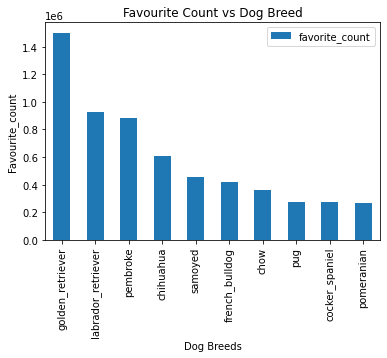

In [111]:
df_fav = df_fav_dog.plot.bar(title="Favourite Count vs Dog Breed")
df_fav.set_ylabel('Favourite_count')
df_fav.set_xlabel('Dog Breeds')

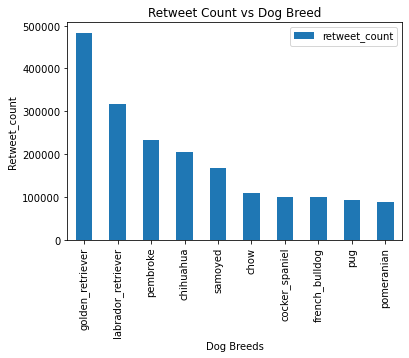

In [108]:
df_ret = df_ret_dog.plot.bar(title="Retweet Count vs Dog Breed")
df_ret.set_ylabel('Retweet_count')
df_ret.set_xlabel('Dog Breeds');

In [114]:
df_aggregated_metric = df_fav_dog.join(df_ret_dog,on='p1').join(df_dog_size,on='p1')

In [115]:
df_aggregated_metric.rename(columns={0:'No_of_dogs'}, inplace=True)

In [116]:
df_aggregated_metric['fav_count_per_pred'] = df_aggregated_metric['favorite_count']/df_aggregated_metric['No_of_dogs']

In [117]:
df_aggregated_metric['retweet_count_per_pred'] = df_aggregated_metric['retweet_count']/df_aggregated_metric['No_of_dogs']

In [118]:
df_aggregated_metric

favorite_count  retweet_count  No_of_dogs  \
p1                                                              
golden_retriever         1502814.0       483586.0       150.0   
labrador_retriever        927478.0       316244.0       100.0   
pembroke                  883411.0       232296.0        89.0   
chihuahua                 609837.0       204885.0        83.0   
samoyed                   455909.0       166870.0        43.0   
french_bulldog            415944.0       100202.0         NaN   
chow                      360064.0       108790.0        44.0   
pug                       276438.0        91612.0        57.0   
cocker_spaniel            273111.0       100447.0         NaN   
pomeranian                269329.0        89022.0        38.0   

                    fav_count_per_pred  retweet_count_per_pred  
p1                                                              
golden_retriever          10018.760000             3223.906667  
labrador_retriever         9274.780000             3162.440000  
pembroke                   9925.966292             2610.067416  
chihuahua                  7347.433735             2468.493976  
samoyed                   10602.534884             3880.697674  
french_bulldog                     NaN                     NaN  
chow                       8183.272727             2472.500000  
pug                        4849.789474             1607.228070  
cocker_spaniel                     NaN                     NaN  
pomeranian                 7087.605263             2342.684211

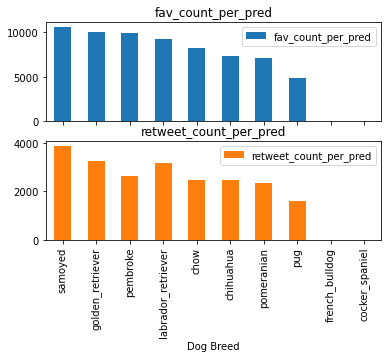

In [126]:
df_aggregated_metric.sort_values("fav_count_per_pred",ascending=False).plot.bar(y=["fav_count_per_pred","retweet_count_per_pred"], subplots=True, xlabel='Dog Breed');